<a href="https://colab.research.google.com/github/chetankolte/Loan-Prediction/blob/master/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 20.6MB/s 


In [0]:
link = 'https://drive.google.com/open?id=1pfodL1WlM9E7dAcdJjGvHQAguErdKq0w'

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1pfodL1WlM9E7dAcdJjGvHQAguErdKq0w


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('loan_prediction_train.csv')  

In [0]:
link2 = 'https://drive.google.com/open?id=10xG_K-91M2SHf0UdMiOy0MlVL7P3p9Hy'
fluff, id2 = link2.split('=')
print(id2)
downloaded2 = drive.CreateFile({'id':id2}) 
downloaded2.GetContentFile('loan_prediction_test.csv')  


10xG_K-91M2SHf0UdMiOy0MlVL7P3p9Hy


In [0]:
data_train = pd.read_csv('loan_prediction_train.csv')
data_test = pd.read_csv('loan_prediction_test.csv')

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [133]:
data_train.shape

(614, 13)

In [134]:
data_test.shape

(367, 12)

In [135]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [136]:


data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [137]:
data_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

# **Distribution Analysis**

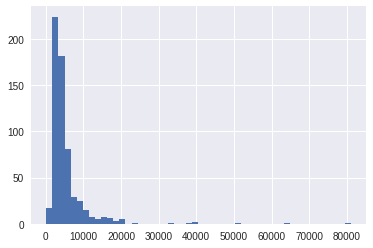

In [138]:



data_train['ApplicantIncome'].hist(bins=50)

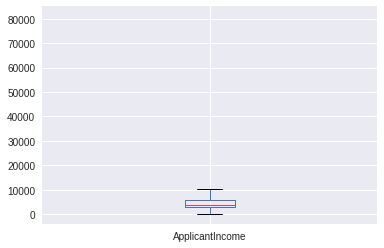

In [139]:


data_train.boxplot(column='ApplicantIncome')

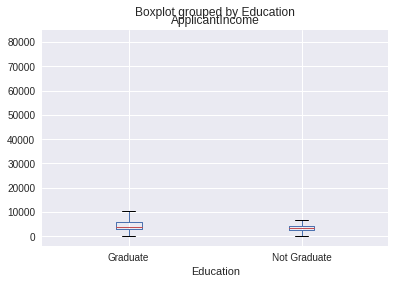

In [140]:

data_train.boxplot(column='ApplicantIncome', by = 'Education')

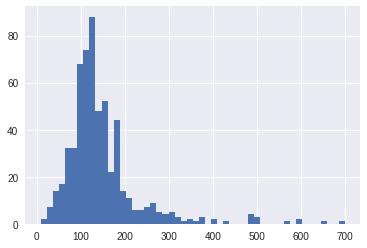

In [141]:
data_train['LoanAmount'].hist(bins=50)

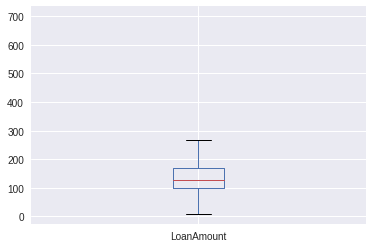

In [142]:
data_train.boxplot(column='LoanAmount')

# Categorical Variable Analysis

In [143]:
temp1 = data_train['Credit_History'].value_counts(ascending=True)
temp2 = data_train.pivot_table(values="Loan_Status", index=['Credit_History'], aggfunc=lambda x: x.map({'Y': 1, 'N': 0}).mean())
print("Frequency Table for Credit History: ")
print(temp1)

print('\nProbability of getting loan for each Credit History class: ')
print(temp2)

Frequency Table for Credit History: 
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class: 
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5, 1.0, 'Probability fo getting loan by Credit_History')

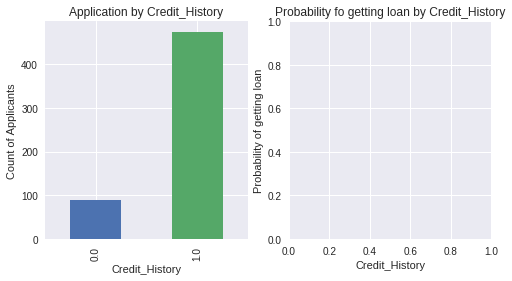

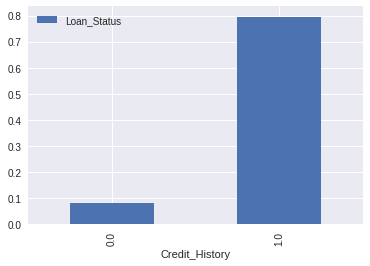

In [144]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Application by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title('Probability fo getting loan by Credit_History')

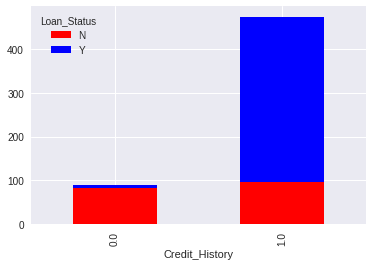

In [145]:
temp3 = pd.crosstab(data_train['Credit_History'], data_train['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid = True)

#Data Munging

**Check missing values in the dataset**

---



In [146]:
data_train.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
data_train['LoanAmount'].fillna(data_train['LoanAmount'].mean(), inplace= True)

In [148]:
data_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [0]:
data_train['Self_Employed'].fillna('No', inplace=True)

In [150]:
data_train['LoanAmount'].median()

129.0

In [0]:
data_train['LoanAmount'].fillna(data_train['LoanAmount'].median(), inplace = True)

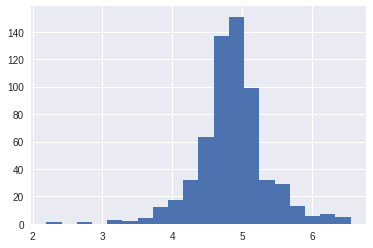

In [152]:
data_train['LoanAmount_log'] = np.log(data_train['LoanAmount'])
data_train['LoanAmount_log'].hist(bins=20)

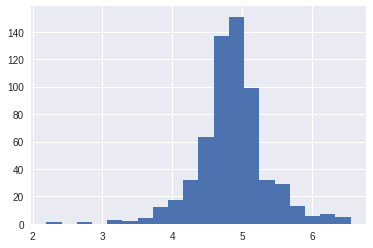

In [153]:

data_train['TotalIncome'] = data_train['ApplicantIncome'] + data_train['CoapplicantIncome']
data_train['TotalIncome_log'] = np.log(data_train['TotalIncome'])
data_train['LoanAmount_log'].hist(bins=20)

In [0]:
data_train['Gender'].fillna(data_train['Gender'].mode()[0], inplace=True)
data_train['Married'].fillna(data_train['Married'].mode()[0], inplace = True)
data_train['Dependents'].fillna(data_train['Dependents'].mode()[0], inplace=True)
data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].mode()[0], inplace=True)
data_train['Credit_History'].fillna(data_train['Credit_History'].mode()[0], inplace=True)

In [155]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for i in var_mod:
  data_train[i] = le.fit_transform(data_train[i])
data_train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [0]:
data_train.drop(['Loan_ID'], inplace=True, axis = 1)

In [162]:
data_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [168]:
data_train2 = data_train.copy

TypeError: ignored

In [164]:
data_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

# Prediction

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def classification_model(model, data, predictors, outcome):
  model.fit(data[predictors], data[outcome])
  
  predictions = model.predict(data[predictors])
  
  accuracy = metrics.accuracy_score(predictions, data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
  error = []
  kf = KFold(5,shuffle=False)
  for train, test in kf.split(data[predictors]):
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
  print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

In [0]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [184]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, data_train,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [185]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, data_train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 77.202%


In [186]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

TotalIncome_log     0.269349
Credit_History      0.241946
LoanAmount_log      0.236780
Property_Area       0.055977
Dependents          0.052371
Loan_Amount_Term    0.045275
Married             0.027426
Education           0.024890
Gender              0.023476
Self_Employed       0.022511
dtype: float64


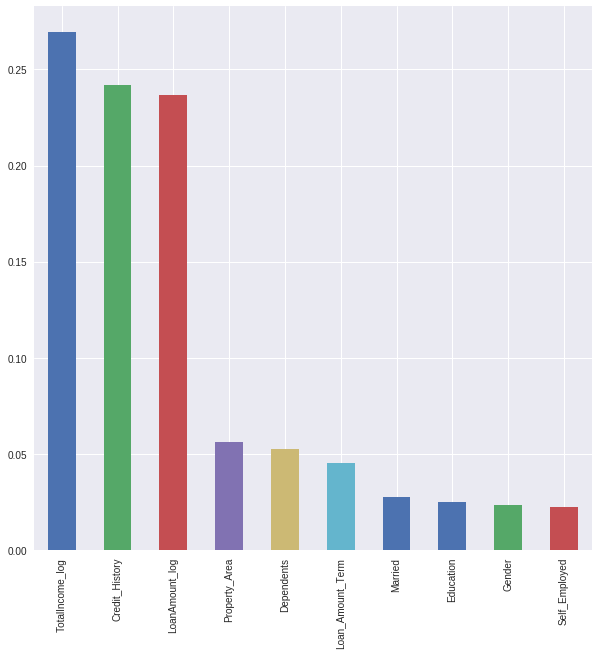

In [189]:
featimp.plot(kind='bar', figsize=(10, 10))

**Using the top 5 features**

In [193]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, data_train, predictor_var, outcome_var)

Accuracy : 83.225%
Cross-Validation Score : 80.621%


The accuracy of the model reduced but the Cross-Validation score is improving showing that the model generalizes well.